In [ ]:
# Try on 6814_1, 6819_1, 6823_1

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import numpy as np
import sys
import time
import pandas as pd
import cv2
import os
import imageio
import matplotlib as mpl
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from deepcell.utils.tracking_utils import trks_stats, save_trks, load_trks

import masks
import gif
import raw
import lineage

In [2]:
np_array = np.load("../22956814/A1_mask_1.npy")

In [3]:
# If sequential is False, need to substitute worm indices into sequential for easy colouring
## Check the unique values in the np arrays - the original worm indices

def make_seq(np_array):  # masked np_array
    uniques_original = list(np.unique(np_array))[1:]  # [1:] to omit values == '0'
    print('unique_worm_ids: ', uniques_original)
    sequential_ids = range(1, len(uniques_original)+1)
    for i, original in enumerate(uniques_original):
        np_array[np_array == uniques_original[i]] = sequential_ids[i]  # Update stacked_array with sequential worm_ids
    print('sequential ids: ', list(np.unique(np_array))[1:])
    
    return np_array

In [4]:
np.unique(np_array)

array([0, 9], dtype=int32)

In [91]:
trk_6814 = load_trks("../22956814/22956814.trks")
y = trk_6814['y']
print(y.shape)

(26, 100, 530, 530, 1)


In [6]:
seq_y = []

for i in range(y.shape[0]):
    seq_mask = make_seq(y[i])
    seq_y.append(seq_mask)
    print(i)

unique_worm_ids:  [9]
sequential ids:  [1]
0
unique_worm_ids:  [7]
sequential ids:  [1]
1
unique_worm_ids:  [7]
sequential ids:  [1]
2
unique_worm_ids:  [5, 289]
sequential ids:  [1, 2]
3
unique_worm_ids:  [3]
sequential ids:  [1]
4
unique_worm_ids:  [3]
sequential ids:  [1]
5
unique_worm_ids:  [20]
sequential ids:  [1]
6
unique_worm_ids:  [32, 33]
sequential ids:  [1, 2]
7
unique_worm_ids:  [32, 33]
sequential ids:  [1, 2]
8
unique_worm_ids:  [21, 22, 157, 290]
sequential ids:  [1, 2, 3, 4]
9
unique_worm_ids:  [21, 22, 157, 290]
sequential ids:  [1, 2, 3, 4]
10
unique_worm_ids:  [185]
sequential ids:  [1]
11
unique_worm_ids:  [37, 46]
sequential ids:  [1, 2]
12
unique_worm_ids:  [37, 46]
sequential ids:  [1, 2]
13
unique_worm_ids:  [47]
sequential ids:  [1]
14
unique_worm_ids:  [34, 38]
sequential ids:  [1, 2]
15
unique_worm_ids:  [34, 38]
sequential ids:  [1, 2]
16
unique_worm_ids:  [35, 36]
sequential ids:  [1, 2]
17
unique_worm_ids:  [35, 36]
sequential ids:  [1, 2]
18
unique_worm_

In [7]:
len(trk_6814['lineages'])

26

In [94]:
# Make X into a list as well

X_list = []

for i in range(trk_6814['X'].shape[0]):
    X_list.append(trk_6814['X'][i])
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


In [92]:
y_list = []

for i in range(trk_6814['y'].shape[0]):
    y_list.append(trk_6814['y'][i])
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


In [61]:
lineages_list = list(trk_6814['lineages'])

In [14]:
for i in lineages[0].keys():
    print(type(i))

<class 'int'>


In [34]:
#lineages[0]

In [59]:
# Change the keys into str:
#new_lineages = []

#lineages[0]

lineages_new = {}

#lineages[0].keys()
#lineages_new[str(list(lineages[0].keys())[0])] = lineages[0][9]

lineages_new[str(list(lineages[8].keys())[0])] = lineages[8][list(lineages[8].keys())[0]]

print(lineages_new)

{'32': {'label': 32, 'frames': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 96, 97, 98, 99], 'daughters': [], 'parent': None}}


In [83]:
lineages_list_new = []

for index in range(len(lineages_list)):    
    lineages_new = {}

    for i in range(len(list(lineages[index].keys()))):
        #lineages_new[str(list(lineages[index].keys())[i])] = lineages[index][list(lineages[index].keys())[i]]
        
        worm = str(list(lineages[index].keys())[i])
        
        #lineages_new[str(list(lineages[index].keys())[i])] = {}
        #lineages_new[str(list(lineages[index].keys())[i])]['label'] = str(lineages[index][list(lineages[index].keys())[i]]['label'])
        
        lineages_new[worm] = {}
        lineages_new[worm]['label'] = str(lineages[index][list(lineages[index].keys())[i]]['label'])
        lineages_new[worm]['frames'] = [str(frame) for frame in lineages[index][list(lineages[index].keys())[i]]['frames']]
        lineages_new[worm]['parent'] = None
        lineages_new[worm]['daughters'] = []
        #print(lineages_new)
    lineages_list_new.append(lineages_new)

In [84]:
len(lineages_list_new)

26

In [86]:
#lineages_list_new[0]

In [12]:
save_trks("../22956814/22956814_seq.trks", lineages, X_list, seq_y)

In [93]:
np.unique(y_list[0])

array([0, 9], dtype=int32)

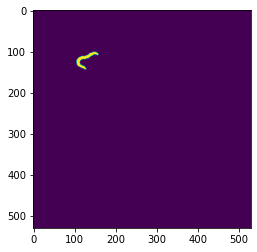

In [90]:
import matplotlib.pyplot as plt
plt.imshow(y_list[0][0])

In [95]:
save_trks("../22956814/22956814_str.trks", lineages_list_new, X_list, y_list)  # So not sequential, but keys are strings

In [98]:
X = trk_6814['X']
y = trk_6814['y']

In [99]:
X.shape

(26, 100, 530, 530, 1)

In [100]:
np.savez("../22956814/22956814_str.npz", X=X, y=y)

## OR

In [70]:
#keys_values = lineages_list[0][9].items()

#new_d = {str(key): str(value) for key, value in keys_values}

#print(new_d)

{'label': '9', 'frames': '[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]', 'daughters': '[]', 'parent': 'None'}


In [ ]:
## Remake everything